### Patika & EnerjiSA Veri Bilimi ve Analitiği Bootcamp Bitirme Projesi Grup-2
- Fatma Nur USLUER

- Furkan KILINÇ

- Gülşah UĞUR

- Mustafacan GENÇGÜL

- Uğur Selim ÖZEN


In [1]:
# Kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import random
from catboost import CatBoostClassifier, Pool
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import tree

pd.options.display.max_columns = 999

In [2]:
# datasetin okunması
df = pd.read_excel("train_5.xlsx")
df.describe()

TUKETIM_M1    TUKETIM_M2    TUKETIM_M3     TUKETIM_M4     TUKETIM_M5  \
count  15000.000000  15000.000000  15000.000000   15000.000000   15000.000000   
mean      96.208479    205.978455    223.982149     217.158467     183.984799   
std      423.739447    806.797729    562.430605    1388.820828    1311.605920   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       18.663720     67.464279     72.497774      71.253761      70.489054   
50%       57.967004    147.897623    156.901631     152.988106     136.929436   
75%      119.764778    244.215963    267.343281     251.375305     203.995790   
max    47318.985000  90851.355000  47803.770000  162381.240000  111955.470968   

         TUKETIM_M6     TUKETIM_M7     TUKETIM_M8    TUKETIM_M9  \
count  15000.000000   15000.000000   15000.000000  15000.000000   
mean     184.405282     215.505007     248.644492    232.900504   
std     1063.798858    1162.260886    1100.215516   1112.950045   
min        0.000000       0.000000       0.000000      0.000000   
25%       72.638329      78.729780      81.960615     77.956021   
50%      138.537125     151.135455     167.395119    156.945536   
75%      201.954775     238.281348     288.195682    261.602692   
max    95467.680000  110822.519806  112852.579355  98479.082839   

         TUKETIM_M10   TUKETIM_M11    TUKETIM_M12    TUKETIM_M13  \
count   15000.000000  15000.000000   15000.000000   14956.000000   
mean      205.188164    186.216120     185.762185     209.439962   
std      1337.520990    815.451431    1227.890992    1574.521488   
min         0.000000      0.000000       0.000000       0.000000   
25%        74.530854     70.880832      67.422199      70.927174   
50%       144.954876    140.683667     136.948706     147.213597   
75%       224.807583    212.418585     210.704846     236.794562   
max    142768.472000  66037.545000  131526.990000  159420.555000   

         TUKETIM_M14   TUKETIM_M15   TUKETIM_M16   TUKETIM_M17    TUKETIM_M18  \
count   14899.000000  14845.000000  14800.000000  14746.000000   14707.000000   
mean      211.400576    227.231838    215.400452    181.813745     185.850441   
std      1499.281161    630.096126    767.122276    681.828994     950.896200   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%        68.199922     73.513714     74.332489     72.989372      75.684527   
50%       140.053495    156.308486    153.405131    139.672244     140.645618   
75%       235.207829    267.282745    252.947487    211.499773     207.428468   
max    160152.930000  56610.225000  75857.985000  62481.510000  105136.920000   

        TUKETIM_M19   TUKETIM_M20   TUKETIM_M21   TUKETIM_M22   TUKETIM_M23  \
count  14664.000000  14608.000000  14568.000000  14515.000000  14456.000000   
mean     212.245346    245.245926    228.493768    187.253831    171.360149   
std      847.143263    754.127130    667.144225    322.313044    292.919080   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       80.527145     83.570039     80.099301     74.431537     70.935518   
50%      150.976357    165.241883    157.434344    143.553273    137.515010   
75%      241.449070    287.237462    264.199954    218.611832    203.310561   
max    85597.155000  68889.555000  66899.385000  14361.357352  12878.880000   

        TUKETIM_M24     DEMAND_M1     DEMAND_M2     DEMAND_M3     DEMAND_M4  \
count  14360.000000  14929.000000  12612.000000  14217.000000  12631.000000   
mean     159.670519      2.965882      3.398323      3.289800      3.142504   
std      290.230780      5.583334      2.748383      2.760945      2.494704   
min     -159.997200      0.000000      0.000000      0.000000      0.000000   
25%       66.885138      1.344000      1.776000      1.664000      1.612000   
50%      128.448784      2.508000      2.940000      2.812000      2.716000   
75%      188.907213      4.048000      4.816000      4.736000      

In [3]:
data0 = df.groupby("NK_FLAG").count()

fig1 = px.pie(data0,
                        values=data0.TUKETIM_M1,
                        names=data0.index ,title="Toplam Kullanıcıların Kaçak Kullanım Dağılımı"
                        )
fig1.update_traces(
                        textposition='inside',
                        
                        )
fig1.update_layout( width = 900 , height = 600 )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TUKETIM_M1              15000 non-null  float64       
 1   TUKETIM_M2              15000 non-null  float64       
 2   TUKETIM_M3              15000 non-null  float64       
 3   TUKETIM_M4              15000 non-null  float64       
 4   TUKETIM_M5              15000 non-null  float64       
 5   TUKETIM_M6              15000 non-null  float64       
 6   TUKETIM_M7              15000 non-null  float64       
 7   TUKETIM_M8              15000 non-null  float64       
 8   TUKETIM_M9              15000 non-null  float64       
 9   TUKETIM_M10             15000 non-null  float64       
 10  TUKETIM_M11             15000 non-null  float64       
 11  TUKETIM_M12             15000 non-null  float64       
 12  TUKETIM_M13             14956 non-null  float6

In [5]:
# sütunları görselleştirmek için kullanılan fonksiyon
def vis_data(df, x, y = 'NK_FLAG', graph = 'countplot'):
    if graph == 'hist':
        fig = px.histogram(df, x = x)
        fig.update_layout(title = 'Distribution of {x}'.format(x = x))
        fig.show()
    elif graph == 'bar':
      fig = px.bar(df, x = x, y = y)
      fig.update_layout(title = '{x} vs. {y}'.format(x = x, y = y))
      fig.show()
    elif graph == 'countplot':
      a = df.groupby([x,y]).count()
      a.reset_index(inplace = True)
      no_fraud = a[a['NK_FLAG'] == 0]
      yes_fraud = a[a['NK_FLAG'] == 1]
      trace1 = go.Bar(x = no_fraud[x], y = no_fraud['id'], name = 'No Fraud')
      trace2 = go.Bar(x = yes_fraud[x], y = yes_fraud['id'], name = 'Fraud')
      fig = go.Figure(data = [trace1, trace2])
      fig.update_layout(title = '{x} vs. {y}'.format(x=x, y = y))
      fig.update_layout(barmode = 'group')
      fig.show()

In [6]:
graphic_df = df.copy()
for i in range(df.shape[0]+1) :
    graphic_df.loc[i, "id"] = i
    
graphic_df['id'] = graphic_df['id'].astype('int')

-----

### Sayaç başlangıç tarihi ve sayaç takılma tarihi eşit olmayan 50 adet abone tespit edildi. Bu 50 abonenin tüketim ve demand hariç geriye kalan tüm verilerinin eksik olduğunu gördük.

In [7]:
eksik_df = graphic_df[graphic_df.SAYAC_BASLANGIC_TARIHI != graphic_df.SAYAC_TAKILMA_TARIHI]
eksik_df.NK_FLAG.value_counts()

0.0    31
1.0    19
Name: NK_FLAG, dtype: int64

In [8]:
vis_data(eksik_df, 'TESISAT_TIPI') 

### Bu abonelerin kaçak oranı %38 olduğu için bu verileri silmek yerine tutmaya karar verdik ve her yerde "EKSIK" olarak grupladık.

------

## Sayaç Marka

In [9]:
vis_data(graphic_df, 'SAYAC_MARKA')

In [10]:
# Sayaç Markalarının kullanım sayılarına göre gruplandırılması
graphic_df['SAYAC_MARKA'] = graphic_df['SAYAC_MARKA'].fillna("EKSIK")
umbrealla = graphic_df['SAYAC_MARKA'].unique()

for umb in umbrealla:
  if (umb != 'ELEKTROMED') & (umb != 'LUNA') & (umb != 'EKSIK'):
    graphic_df['SAYAC_MARKA'] = graphic_df['SAYAC_MARKA'].str.replace(umb, 'DIGER')

graphic_df['SAYAC_MARKA'].unique()
vis_data(graphic_df, 'SAYAC_MARKA')

## Sayaç Model

In [11]:
vis_data(graphic_df, 'SAYAC_MODEL')

### LUN10-B modelindeki 462 olan kaçak sayısı toplam kaçak sayısının %45'ini oluşturduğu gözlenmiştir.

In [12]:
# Sayaç Modellerine göre toplam abone, kaçak sayısı ve kaçak oranının bulunması
df_id = pd.DataFrame(df.SAYAC_MODEL.unique(), columns= ["SAYAC_MODEL"])
df_id

for i in df.SAYAC_MODEL.unique():
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["KACAK_SAYISI"]] = df.loc[df.SAYAC_MODEL == i].NK_FLAG.sum()
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["TOPLAM_ABONE"]] = len(df.loc[df.SAYAC_MODEL == i].NK_FLAG)
  df_id.loc[df_id["SAYAC_MODEL"] == i, ["KACAK_ORANI"]] = df_id.KACAK_SAYISI / df_id.TOPLAM_ABONE *100
df_id.sort_values("KACAK_SAYISI", ascending=False)

SAYAC_MODEL  KACAK_SAYISI  TOPLAM_ABONE  KACAK_ORANI
4        LUN10-B         462.0        2261.0    20.433437
3          LUN10         128.0        2240.0     5.714286
1       EC058MBW         113.0        3447.0     3.278213
7       EC058MCT          63.0         791.0     7.964602
6   VEM-M580DB0E          42.0         906.0     4.635762
..           ...           ...           ...          ...
17        VEES-1           0.0          12.0     0.000000
53        VEES-3           0.0           3.0     0.000000
54     VEES-30BD           0.0           3.0     0.000000
76     T600.2251           0.0           1.0     0.000000
29           NaN           NaN           NaN          NaN

[77 rows x 4 columns]

In [13]:
# Sayaç modellerinin yukarıda oluşturulan tabloya göre kaçak oranı baz alınarak gruplandırılması

SAYAC_MODEL_DICT = {
    'LUN10-B' : "%20",
    'AEL.TF.16-2' : "%20",
    'LUN23 TF' : "%20",
    'EC058MCT' : '%6-8', 
    'LSM-35': '%6-8', 
    'VEM-T5100DB0E': '%6-8', 
    'T510.2251': '%6-8', 
    'M500.2211': '%6-8',
    'LUN10' : '%3-5',
    'EC058MBW' : '%3-5',
    'VEM-M580DB0E' : '%3-5',
    'VEM-M580DB0' :  '%3-5',
    'LUN21' :  '%3-5',
    'EC25TPA3CHB' :  '%3-5',
    'VEM-T5100DB0' :  '%3-5',
    'LUN1' : '%1-3', 
    'EC018MBW': '%1-3', 
    'AEL.MF.07': '%1-3', 
    'EC15ATBW': '%1-3', 
    'M500.2251': '%1-3', 
    'M310.2218': '%1-3', 
    'M550.2251': '%1-3', 
    'EC11ATBW': '%1-3', 
    'AEL.TF.16': '%1-3',
    'EKSIK': 'EKSIK'
}
df.loc[df.SAYAC_MODEL.isnull(),["SAYAC_MODEL"]] = 'EKSIK'
df["SAYAC_MODEL_group"] = df.SAYAC_MODEL.map(SAYAC_MODEL_DICT)
df.loc[df.SAYAC_MODEL_group.isnull(),["SAYAC_MODEL_group"]] = "DIGER"
df["SAYAC_MODEL_group"].value_counts()

%3-5     6922
%1-3     3814
%20      2311
%6-8     1362
DIGER     541
EKSIK      50
Name: SAYAC_MODEL_group, dtype: int64

In [14]:
# Gruplanan sayaç modellerinin kaçak sayı ve oranları

df_id = pd.DataFrame(df.SAYAC_MODEL_group.unique(), columns= ["SAYAC_MODEL_group"])
df_id

for i in df.SAYAC_MODEL_group.unique():
  df_id.loc[df_id["SAYAC_MODEL_group"] == i, ["KACAK_SAYISI"]] = df.loc[df.SAYAC_MODEL_group == i].NK_FLAG.sum()
  df_id.loc[df_id["SAYAC_MODEL_group"] == i, ["TOPLAM_ABONE"]] = len(df.loc[df.SAYAC_MODEL_group == i].NK_FLAG)
  df_id.loc[df_id["SAYAC_MODEL_group"] == i, ["KACAK_ORANI"]] = df_id.KACAK_SAYISI / df_id.TOPLAM_ABONE *100
df_id.sort_values("KACAK_SAYISI", ascending=False)

SAYAC_MODEL_group  KACAK_SAYISI  TOPLAM_ABONE  KACAK_ORANI
2               %20         473.0        2311.0    20.467330
1              %3-5         293.0        6922.0     4.232881
3              %6-8         108.0        1362.0     7.929515
0              %1-3          84.0        3814.0     2.202412
4             DIGER          43.0         541.0     7.948244
5             EKSIK          19.0          50.0    38.000000

-------

## Tesisat Tipi

In [15]:
vis_data(graphic_df, 'TESISAT_TIPI')

## Mesken tipi tesisatlarda kaçak kullanım oranı %6.3 çıkarken Ticarethane-Sanayi tipi tesisatlarda kaçak kullanım oranı %11.1 çıkmıştır.

-----

## Sayaç Ölçüm Türü

In [16]:
# Sayaç ölçüm türündeki boş olan verilerin doldurulması ve görselleştirilmesi
graphic_df['SAYAC_OLCUM_TURU'] = graphic_df['SAYAC_OLCUM_TURU'].fillna("EKSIK")
vis_data(graphic_df, 'SAYAC_OLCUM_TURU')

------

## Sayaç Faz Sayısı

In [17]:
# SAYAC_FAZ_N'de bulunan boş olan verilerin doldurulması ve görselleştirilmesi
# SAYAC_FAZ_N sütunu TESISAT_TIPI sütunu ile çok yüksek benzerlik gösterdiği için SAYAC_FAZ_N sütununu modele dahil etmedik.
graphic_df['SAYAC_FAZ_N'] = graphic_df['SAYAC_FAZ_N'].fillna("EKSIK")
vis_data(graphic_df, 'SAYAC_FAZ_N')

------

## Sayaç Okuma Birimi Risk Skoru

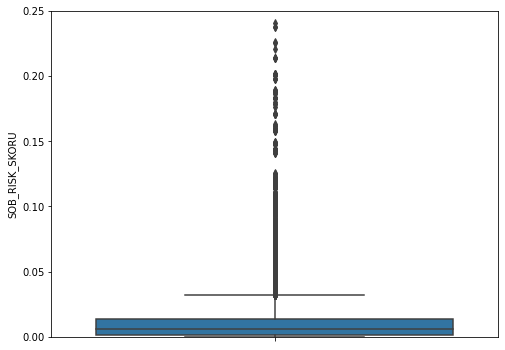

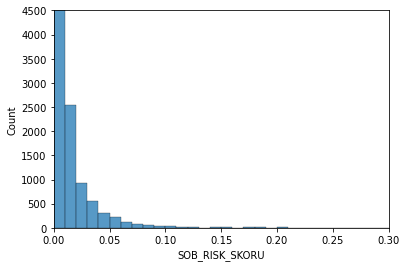

In [18]:
cat = 'SOB_RISK_SKORU'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=cat, data=df)
fig.axis(ymin=0, ymax=0.25);
fig, ax = plt.subplots()
sns.histplot(binwidth=0.01,data=df,x="SOB_RISK_SKORU",ax=ax)
ax.set_xlim(0,0.3)
ax.set_ylim(0,4500)
plt.show()

-----

## Sokak Risk Raporu

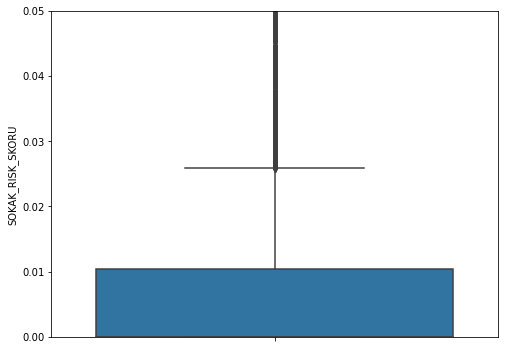

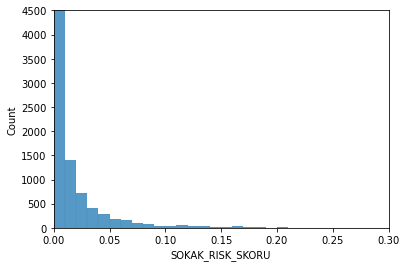

In [19]:
cat = 'SOKAK_RISK_SKORU'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=cat, data=df)
fig.axis(ymin=0, ymax=0.05);

fig, ax = plt.subplots()
sns.histplot(binwidth=0.01,data=df,x="SOKAK_RISK_SKORU",ax=ax)
ax.set_xlim(0,0.3)
ax.set_ylim(0,4500)
plt.show()

----

## Mahalle Risk Skoru

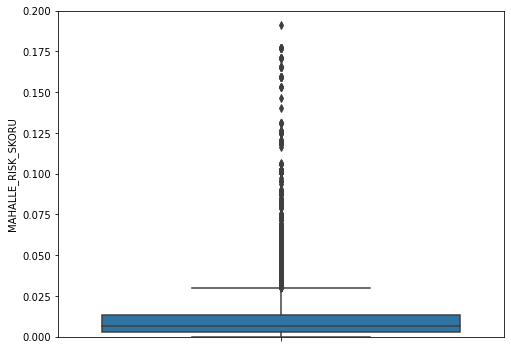

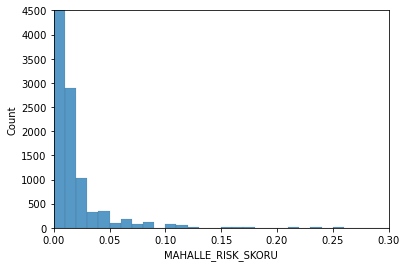

In [20]:
cat = 'MAHALLE_RISK_SKORU'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(y=cat, data=df)
fig.axis(ymin=0, ymax=0.2);

fig, ax = plt.subplots()
sns.histplot(binwidth=0.01,data=df,x="MAHALLE_RISK_SKORU",ax=ax)
ax.set_xlim(0,0.3)
ax.set_ylim(0,4500)
plt.show()


-------

## Sayaç Yaş
### Sayaç yaşlarının hesaplanması ve aynı isimde yeni sütun oluşturulması işlemi yapıldı.

In [21]:
# Sayaç yaşını hesaplanması
imb = df['SAYAC_YAPIM_YILI'].unique()
guncel = 2021
for i in imb:
    df['SAYAC_YAS'] = guncel - df['SAYAC_YAPIM_YILI'] 
df['SAYAC_YAS'].fillna(99,inplace=True)


In [22]:
# Hesaplananların sayaç yaşlarına göre gruplanması
df["SAYAC_YAS"].replace({
    1 : "0-3 YAŞ",
    2 : "0-3 YAŞ",
    3 : "0-3 YAŞ",
    4 : '4 YAŞ', 
    5 : '4+ YAŞ', 
    6 : '4+ YAŞ', 
    7 : '4+ YAŞ', 
    8 : '4+ YAŞ', 
    9 : '4+ YAŞ',
    10 : '4+ YAŞ', 
    11 : '4+ YAŞ', 
    12 : '4+ YAŞ', 
    13 : '4+ YAŞ', 
    14 : '4+ YAŞ', 
    99 : 'EKSIK'}, inplace=True)
df["SAYAC_YAS"].value_counts()

4+ YAŞ     11039
4 YAŞ       2300
0-3 YAŞ     1611
EKSIK         50
Name: SAYAC_YAS, dtype: int64

-----

## Abonelik Süresi

### TUKETIM_M13 ile TUKETIM_M24 arasında boş hücreler olduğunu gördük. Bunları doldurmak için tüketicinin abonelik süresine bakarak değerleri teyit etmeyi amaçladık. Bunun için de ABONELIK_SURESI adında yeni bir sütun oluşturduk.

In [23]:
# Kullanıcıların abonelik süresinin hesaplanması
df["GUNCEL_TARIH"] = np.datetime64("2021-11-04")
df["ABONELIK_SURESI"] = round((df["GUNCEL_TARIH"] - df.SAYAC_BASLANGIC_TARIHI).dt.days / 30)
df['ABONELIK_SURESI'] = df['ABONELIK_SURESI'].fillna(500)
df[["TUKETIM_M24","ABONELIK_SURESI"]].sort_values("ABONELIK_SURESI", ascending=True)

TUKETIM_M24  ABONELIK_SURESI
10349   110.499391             19.0
6562    145.324023             19.0
11037   200.912300             19.0
1117     54.118147             19.0
1301    525.662510             19.0
...            ...              ...
13236     2.451724            500.0
4909     25.573785            500.0
2589      4.400449            500.0
14623   113.261282            500.0
12405          NaN            500.0

[15000 rows x 2 columns]

In [24]:
# Abonelik süresine göre kaçak sayısı ve kaçak oranının hesaplanması
df_id = pd.DataFrame(df.ABONELIK_SURESI.unique(), columns= ["ABONELIK_SURESI"])
df_id

for i in df.ABONELIK_SURESI.unique():
  df_id.loc[df_id["ABONELIK_SURESI"] == i, ["KACAK_SAYISI"]] = df.loc[df.ABONELIK_SURESI == i].NK_FLAG.sum()
  df_id.loc[df_id["ABONELIK_SURESI"] == i, ["TOPLAM_ABONE"]] = len(df.loc[df.ABONELIK_SURESI == i].NK_FLAG)
  df_id.loc[df_id["ABONELIK_SURESI"] == i, ["KACAK_ORANI"]] = df_id.KACAK_SAYISI / df_id.TOPLAM_ABONE *100
df_id = df_id.sort_values("KACAK_ORANI", ascending=False)
df_id.head(20)

ABONELIK_SURESI  KACAK_SAYISI  TOPLAM_ABONE  KACAK_ORANI
44             23.0          34.0          67.0    50.746269
61             24.0          38.0          79.0    48.101266
52            500.0          19.0          50.0    38.000000
9              25.0          26.0          73.0    35.616438
34             29.0          20.0          60.0    33.333333
49             21.0          27.0          92.0    29.347826
46             30.0          18.0          65.0    27.692308
6              31.0          11.0          41.0    26.829268
28             26.0          24.0          91.0    26.373626
43             22.0          41.0         159.0    25.786164
41             40.0          26.0         105.0    24.761905
38             34.0          28.0         119.0    23.529412
26             35.0          12.0          52.0    23.076923
15             38.0          18.0          79.0    22.784810
4              27.0          15.0          66.0    22.727273
40             28.0          18.0          88.0    20.454545
31             36.0          21.0         104.0    20.192308
90             86.0           1.0           5.0    20.000000
36             39.0          13.0          70.0    18.571429
53             37.0          11.0          60.0    18.333333

### TUKETIM_M24 değeri dolu ise tüketici 24 aydır abonedir. Ancak ilk satırda da görüldüğü üzere 19 aylık abone olan kullanıcıların TUKETIM_M24 değerlerinin dolu olduğunu gördük. Bu şekilde uyuşmazlık olan değerleri inceliyoruz. Geri kalan tüketim sütunlarındaki NaN değerlere 0 yazabiliriz.

In [25]:
# HataliTuketim, örnek verecek olursak 19 aylık abonenin 24 aya kadar dolu olan tüketim değerlerinin toplamını içerir. 
liste = [19,20,21,22,23]
for abonelik_suresi in liste:
    df.loc[df["ABONELIK_SURESI"] == abonelik_suresi, ["HATALI_TUKETIM"]]= df.iloc[:, abonelik_suresi:24].sum(axis=1)
    df["ABONE_SURESI_UYUSMAZLIGI"] = df["HATALI_TUKETIM"] > 0
df[ df["ABONE_SURESI_UYUSMAZLIGI"]].NK_FLAG.sum() / len(df["ABONE_SURESI_UYUSMAZLIGI"])
df["ABONE_SURESI_UYUSMAZLIGI"].corr(df["NK_FLAG"])

0.1293633298677562

### Uyuşmazlık olan 341 adet satır tespit edildi. Bu satırların %28'inin NK_FLAG değerinin 1 olduğu gözlendi. Yeni oluşturulan "ABONE_SURESI_UYUSMAZLIGI" sütununun hem NK_FLAG oranının yüksek olması hem de toplamdaki kaçak değerlerinin yaklaşık %10'unu içermesi sebebiyle bu satırları silmemeye karar verdik.

In [26]:
df.drop("HATALI_TUKETIM", inplace=True, axis = 1) # sütunla işlemler bitti ve tekrar kullanılmadığı için droplandı

In [27]:
# Sütunlarda bulunan null değerler ve onların yüzdesinin tespiti
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Toplam', 'NullDegerYuzdesi'])
missing_data

Toplam  NullDegerYuzdesi
DEMAND_M12                  3175          0.211667
DEMAND_M10                  2758          0.183867
DEMAND_M8                   2757          0.183800
DEMAND_M6                   2582          0.172133
DEMAND_M2                   2388          0.159200
DEMAND_M4                   2369          0.157933
DEMAND_M11                  1308          0.087200
DEMAND_M9                   1234          0.082267
DEMAND_M7                   1022          0.068133
DEMAND_M5                    945          0.063000
DEMAND_M3                    783          0.052200
TUKETIM_M24                  640          0.042667
TUKETIM_M23                  544          0.036267
TUKETIM_M22                  485          0.032333
TUKETIM_M21                  432          0.028800
TUKETIM_M20                  392          0.026133
TUKETIM_M19                  336          0.022400
TUKETIM_M18                  293          0.019533
TUKETIM_M17                  254          0.016933
TUKETIM_M16                  200          0.013333
TUKETIM_M15                  155          0.010333
TUKETIM_M14                  101          0.006733
DEMAND_M1                     71          0.004733
SAYAC_FAZ_N                   50          0.003333
SAYAC_BITIS_TARIHI            50          0.003333
SAYAC_MARKA                   50          0.003333
SAYAC_YAPIM_YILI              50          0.003333
SAYAC_TAKILMA_TARIHI          50          0.003333
SAYAC_BASLANGIC_TARIHI        50          0.003333
SAYAC_OLCUM_TURU              50          0.003333
SAYAC_MALZEME_ID              50          0.003333
TUKETIM_M13                   44          0.002933
NK_FLAG                        0          0.000000
SAYAC_MODEL_group              0          0.000000
SAYAC_YAS                      0          0.000000
GUNCEL_TARIH                   0          0.000000
ABONELIK_SURESI                0          0.000000
TESISAT_TIPI                   0          0.000000
SAYAC_MODEL                    0          0.000000
TUKETIM_M1                     0          0.000000
MAHALLE_RISK_SKORU             0          0.000000
SOKAK_RISK_SKORU               0          0.000000
SOB_RISK_SKORU                 0          0.000000
TUKETIM_M2                     0          0.000000
TUKETIM_M12                    0          0.000000
TUKETIM_M11                    0          0.000000
TUKETIM_M10                    0          0.000000
TUKETIM_M9                     0          0.000000
TUKETIM_M8                     0          0.000000
TUKETIM_M7                     0          0.000000
TUKETIM_M6                     0          0.000000
TUKETIM_M5                     0          0.000000
TUKETIM_M4                     0          0.000000
TUKETIM_M3                     0          0.000000
ABONE_SURESI_UYUSMAZLIGI       0          0.000000

-------

### Demand sütunlarındaki null verilerin, varsa sağ ve sol sütunlarındaki değerlerin ortalaması ile yoksa da satırın ortalama değeri ile doldurulması işlemi:

In [28]:
#demand 1 boş ise demand 2'deki değere eşitle
df.loc[df.iloc[:, 24].isnull(), [df.iloc[:, 24].name]] = df[df.iloc[:, 24].isnull()].iloc[:, 25].tolist()
#demeand 12 boş ise demand 11'deki değere eşitle
df.loc[df.iloc[:, 35].isnull(), [df.iloc[:, 35].name]] = df[df.iloc[:, 35].isnull()].iloc[:, 34].tolist()
#demand 2 ile 11 arasındaki boşlukları önceki ve sonraki demand ortalamasına eşitle
for i in range(25,35):
  sutun = df.iloc[:, i]
  onceki_sutun = df[sutun.isnull()].iloc[:, i-1].tolist()
  sonraki_sutun = df[sutun.isnull()].iloc[:, i+1].tolist()
  df.loc[sutun.isnull(), [sutun.name]] = np.array(onceki_sutun) + np.array(sonraki_sutun) / 2
#her bir satırın kalan bos demandlarını o satırın ortalama demandine eşitle 
for i in range(24,36):
  sutun = df.iloc[:, i]
  df.loc[sutun.isnull(), [sutun.name]] = df.iloc[:, 24:35].mean(axis=1)
#hiçbir tüketim değeri yok ise 999_999'a eşitle
for i in range(24,36):
  sutun = df.iloc[:, i]
  df[sutun.name].fillna(999999, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TUKETIM_M1                15000 non-null  float64       
 1   TUKETIM_M2                15000 non-null  float64       
 2   TUKETIM_M3                15000 non-null  float64       
 3   TUKETIM_M4                15000 non-null  float64       
 4   TUKETIM_M5                15000 non-null  float64       
 5   TUKETIM_M6                15000 non-null  float64       
 6   TUKETIM_M7                15000 non-null  float64       
 7   TUKETIM_M8                15000 non-null  float64       
 8   TUKETIM_M9                15000 non-null  float64       
 9   TUKETIM_M10               15000 non-null  float64       
 10  TUKETIM_M11               15000 non-null  float64       
 11  TUKETIM_M12               15000 non-null  float64       
 12  TUKETIM_M13       

In [29]:
# sütunlardaki unique değerlerin sayısının yazdırılması
for col in df.columns:
        print(str(col) +" : " + str(df[col].nunique()))

TUKETIM_M1 : 14164
TUKETIM_M2 : 14317
TUKETIM_M3 : 14380
TUKETIM_M4 : 14382
TUKETIM_M5 : 14474
TUKETIM_M6 : 14472
TUKETIM_M7 : 14523
TUKETIM_M8 : 14489
TUKETIM_M9 : 14481
TUKETIM_M10 : 14454
TUKETIM_M11 : 14456
TUKETIM_M12 : 14382
TUKETIM_M13 : 14385
TUKETIM_M14 : 14266
TUKETIM_M15 : 14269
TUKETIM_M16 : 14199
TUKETIM_M17 : 14223
TUKETIM_M18 : 14219
TUKETIM_M19 : 14240
TUKETIM_M20 : 14131
TUKETIM_M21 : 14095
TUKETIM_M22 : 14031
TUKETIM_M23 : 13975
TUKETIM_M24 : 13831
DEMAND_M1 : 3017
DEMAND_M2 : 4079
DEMAND_M3 : 3460
DEMAND_M4 : 4037
DEMAND_M5 : 3273
DEMAND_M6 : 3732
DEMAND_M7 : 3077
DEMAND_M8 : 3851
DEMAND_M9 : 3264
DEMAND_M10 : 3997
DEMAND_M11 : 3649
DEMAND_M12 : 3719
SOB_RISK_SKORU : 2879
SOKAK_RISK_SKORU : 1377
MAHALLE_RISK_SKORU : 1426
TESISAT_TIPI : 2
SAYAC_BASLANGIC_TARIHI : 1556
SAYAC_BITIS_TARIHI : 1
SAYAC_MARKA : 9
SAYAC_MODEL : 77
SAYAC_MALZEME_ID : 34
SAYAC_OLCUM_TURU : 2
SAYAC_FAZ_N : 2
SAYAC_TAKILMA_TARIHI : 1556
SAYAC_YAPIM_YILI : 14
NK_FLAG : 2
SAYAC_MODEL_group : 6
SAYA

## Parametrelerin birbiri ile olan korelasyonlarının görselleştirilmesi yapıldı.

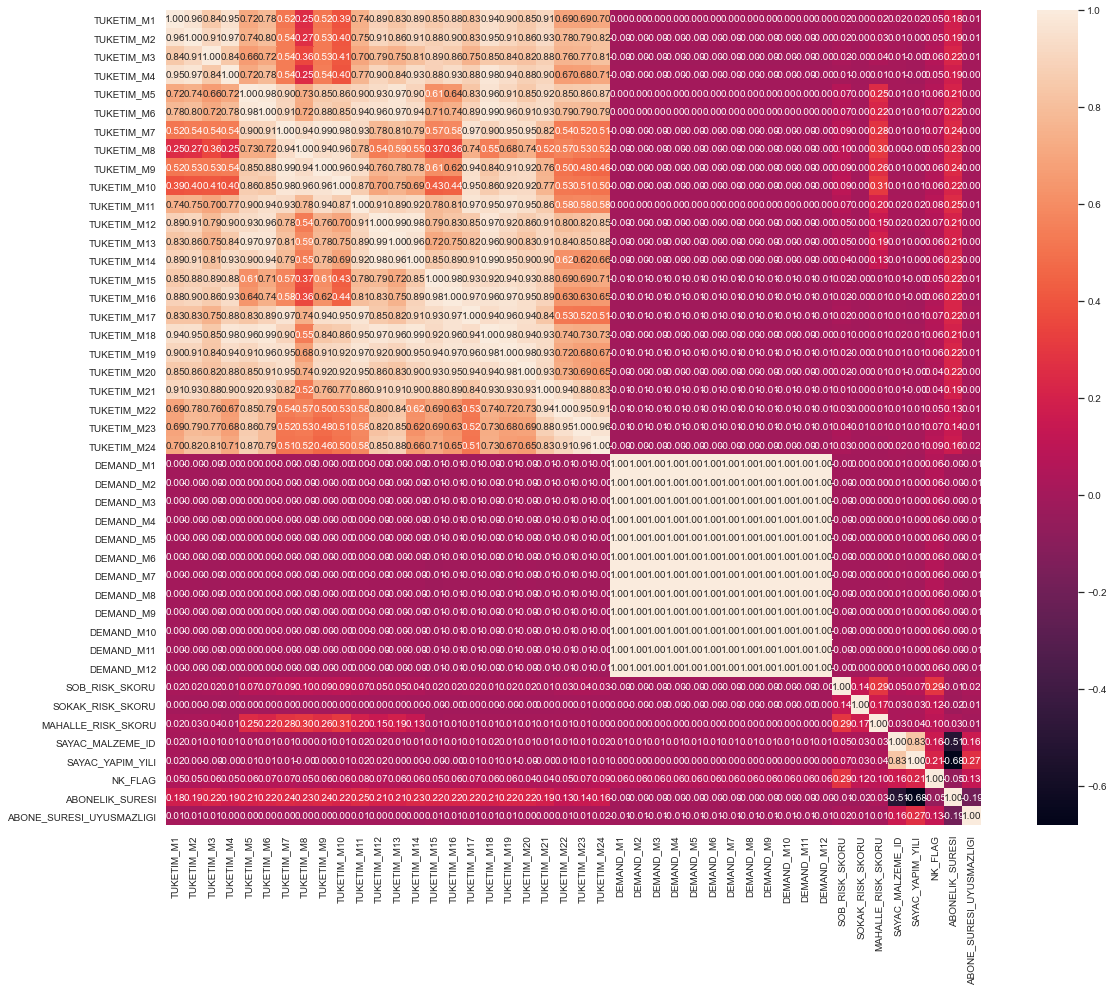

In [30]:
corr = df.corr()
k = 20 #number of variables for heatmap
cols = corr.nlargest(k, 'NK_FLAG')['NK_FLAG'].index
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(20, 15))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

## Sayısal değerlere sahip sütunların tespiti ve listelenmesi

In [31]:
numeric_df = df.select_dtypes(include=np.number)

In [32]:
numeric_df.describe()

TUKETIM_M1    TUKETIM_M2    TUKETIM_M3     TUKETIM_M4     TUKETIM_M5  \
count  15000.000000  15000.000000  15000.000000   15000.000000   15000.000000   
mean      96.208479    205.978455    223.982149     217.158467     183.984799   
std      423.739447    806.797729    562.430605    1388.820828    1311.605920   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       18.663720     67.464279     72.497774      71.253761      70.489054   
50%       57.967004    147.897623    156.901631     152.988106     136.929436   
75%      119.764778    244.215963    267.343281     251.375305     203.995790   
max    47318.985000  90851.355000  47803.770000  162381.240000  111955.470968   

         TUKETIM_M6     TUKETIM_M7     TUKETIM_M8    TUKETIM_M9  \
count  15000.000000   15000.000000   15000.000000  15000.000000   
mean     184.405282     215.505007     248.644492    232.900504   
std     1063.798858    1162.260886    1100.215516   1112.950045   
min        0.000000       0.000000       0.000000      0.000000   
25%       72.638329      78.729780      81.960615     77.956021   
50%      138.537125     151.135455     167.395119    156.945536   
75%      201.954775     238.281348     288.195682    261.602692   
max    95467.680000  110822.519806  112852.579355  98479.082839   

         TUKETIM_M10   TUKETIM_M11    TUKETIM_M12    TUKETIM_M13  \
count   15000.000000  15000.000000   15000.000000   14956.000000   
mean      205.188164    186.216120     185.762185     209.439962   
std      1337.520990    815.451431    1227.890992    1574.521488   
min         0.000000      0.000000       0.000000       0.000000   
25%        74.530854     70.880832      67.422199      70.927174   
50%       144.954876    140.683667     136.948706     147.213597   
75%       224.807583    212.418585     210.704846     236.794562   
max    142768.472000  66037.545000  131526.990000  159420.555000   

         TUKETIM_M14   TUKETIM_M15   TUKETIM_M16   TUKETIM_M17    TUKETIM_M18  \
count   14899.000000  14845.000000  14800.000000  14746.000000   14707.000000   
mean      211.400576    227.231838    215.400452    181.813745     185.850441   
std      1499.281161    630.096126    767.122276    681.828994     950.896200   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%        68.199922     73.513714     74.332489     72.989372      75.684527   
50%       140.053495    156.308486    153.405131    139.672244     140.645618   
75%       235.207829    267.282745    252.947487    211.499773     207.428468   
max    160152.930000  56610.225000  75857.985000  62481.510000  105136.920000   

        TUKETIM_M19   TUKETIM_M20   TUKETIM_M21   TUKETIM_M22   TUKETIM_M23  \
count  14664.000000  14608.000000  14568.000000  14515.000000  14456.000000   
mean     212.245346    245.245926    228.493768    187.253831    171.360149   
std      847.143263    754.127130    667.144225    322.313044    292.919080   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       80.527145     83.570039     80.099301     74.431537     70.935518   
50%      150.976357    165.241883    157.434344    143.553273    137.515010   
75%      241.449070    287.237462    264.199954    218.611832    203.310561   
max    85597.155000  68889.555000  66899.385000  14361.357352  12878.880000   

        TUKETIM_M24      DEMAND_M1      DEMAND_M2      DEMAND_M3  \
count  14360.000000   15000.000000   15000.000000   15000.000000   
mean     159.670519    4736.280443    4736.650853    4736.552759   
std      290.230780   68638.222838   68638.197123   68638.203888   
min     -159.997200       0.000000       0.000000       0.000000   
25%       66.885138       1.360000       1.579750       1.539000   
50%      128.448784       2.517000       2.916000       2.772000   
75%      188.907213       4.088000       4.786500       4.704000   
max    16314.555000  999999.000000  999999.000000  999999.000000   

       

***

## Tüketim değerlerinin grafiksel gösterimi

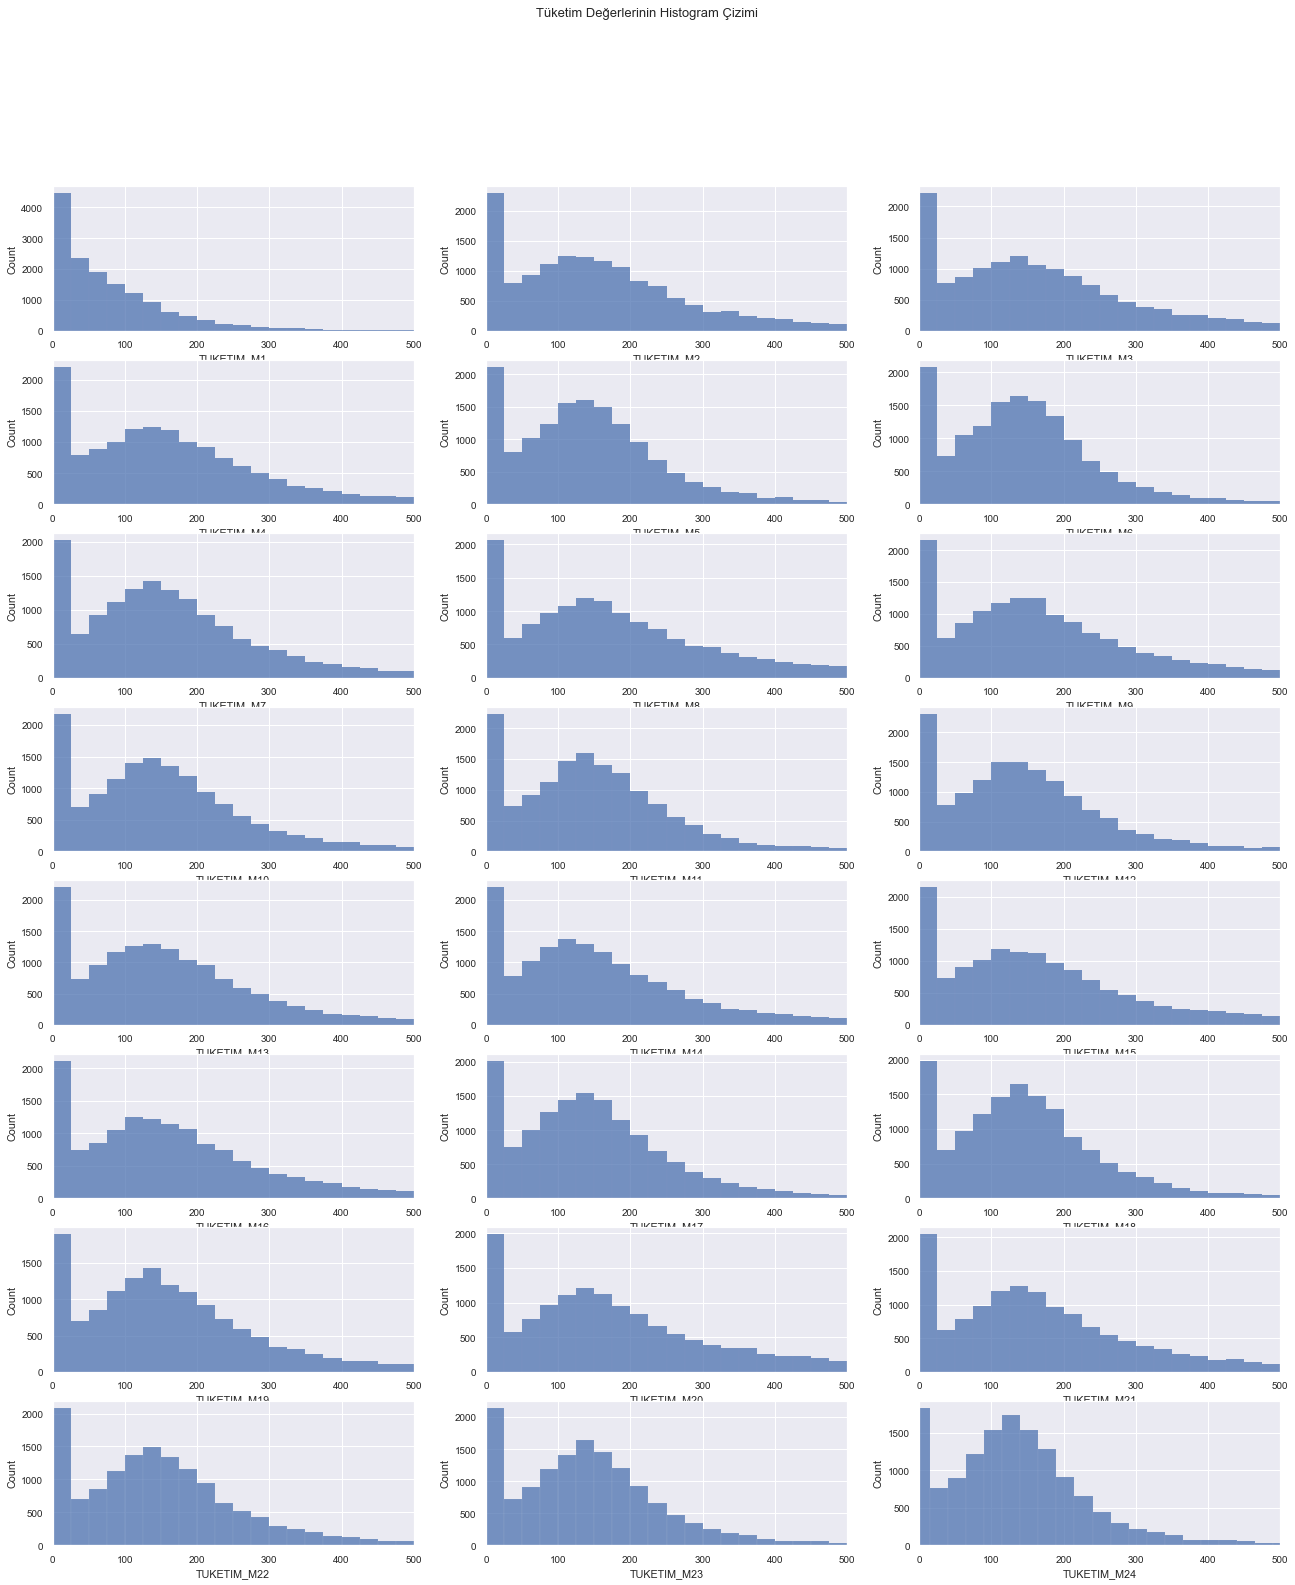

In [33]:
fig, axes = plt.subplots(8, 3, figsize=(22, 25))

fig.suptitle('Tüketim Değerlerinin Histogram Çizimi')
sns.histplot(binwidth=25, data=df,x="TUKETIM_M1",ax=axes[0, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M2",ax=axes[0, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M3",ax=axes[0, 2]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M4",ax=axes[1, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M5",ax=axes[1, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M6",ax=axes[1, 2]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M7",ax=axes[2, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M8",ax=axes[2, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M9",ax=axes[2, 2]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M10",ax=axes[3, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M11",ax=axes[3, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M12",ax=axes[3, 2]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M13",ax=axes[4, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M14",ax=axes[4, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M15",ax=axes[4, 2]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M16",ax=axes[5, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M17",ax=axes[5, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M18",ax=axes[5, 2]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M19",ax=axes[6, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M20",ax=axes[6, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M21",ax=axes[6, 2]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M22",ax=axes[7, 0]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M23",ax=axes[7, 1]).set(xlim=(0, 500))
sns.histplot(binwidth=25, data=df,x="TUKETIM_M24",ax=axes[7, 2]).set(xlim=(0, 500))
plt.show()

------

### Sayaç yapım yılına göre kaçak oranının tablolaştırılması

In [34]:
sayac_df = pd.DataFrame(df.SAYAC_YAPIM_YILI.unique(), columns = ["SAYAC_YAPIM_YILI"])
for year in df.SAYAC_YAPIM_YILI.unique():
  sayac_df.loc[sayac_df.SAYAC_YAPIM_YILI == year, ["kacak_oranı"]] = df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"].sum() / len(df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"]) * 100
  sayac_df.loc[sayac_df.SAYAC_YAPIM_YILI == year, ["sayac_sayisi"]] = len(df[df.SAYAC_YAPIM_YILI == year]["NK_FLAG"])
sayac_df.sort_values("kacak_oranı", ascending = False)

<ipython-input-34-74b1389bf939>:3: RuntimeWarning:

invalid value encountered in longlong_scalars



SAYAC_YAPIM_YILI  kacak_oranı  sayac_sayisi
5             2019.0    27.096774         930.0
6             2018.0    22.183709         577.0
10            2020.0    19.230769         104.0
3             2017.0    11.130435        2300.0
2             2016.0     4.316547        3336.0
1             2015.0     3.424179        1431.0
7             2014.0     2.889035        1523.0
4             2013.0     2.510760        1394.0
0             2012.0     2.294854        1438.0
9             2011.0     2.132521        1313.0
8             2010.0     2.010050         597.0
12            2007.0     0.000000           2.0
13            2008.0     0.000000           2.0
14            2009.0     0.000000           3.0
11               NaN          NaN           NaN

----

## Her bir sayaç modeli için belirlenen bir Sayaç Malzeme ID olduğunu tespit ettik. Bu sebeple ilerleyen aşamalrda SAYAC_MALZEME_ID sütunu drop edildi.

In [35]:
df_Grup = df.groupby(['SAYAC_MALZEME_ID'])["SAYAC_MODEL"].nunique().sort_values(ascending=False)
df_Grup

SAYAC_MALZEME_ID
80000710.0    7
80001000.0    5
80000070.0    5
80000520.0    4
80000850.0    4
80000110.0    4
80000000.0    3
80000150.0    3
80000730.0    3
80000160.0    3
80000100.0    3
80000080.0    3
80000860.0    3
80000120.0    2
80000620.0    2
80000990.0    2
80000980.0    2
80000960.0    2
80001010.0    1
80001020.0    1
80000970.0    1
80000950.0    1
80000740.0    1
80000800.0    1
80000790.0    1
80000770.0    1
80000760.0    1
80000750.0    1
80000010.0    1
80000720.0    1
80000060.0    1
80000030.0    1
80000020.0    1
80001030.0    1
Name: SAYAC_MODEL, dtype: int64

In [36]:
# SAYAC_MALZEME_ID sütununun jupyter notebook'da 34 tane unique değeri görünmesine rağmen gerçekte 76 tane unique değeri var.
df["SAYAC_MALZEME_ID"].nunique()

34

----

## Datasetin Sayaç Başlangıç Tarihine göre sıralanması

In [37]:
df = df.sort_values(by='SAYAC_BASLANGIC_TARIHI',ascending=False)
df.head()

TUKETIM_M1  TUKETIM_M2  TUKETIM_M3  TUKETIM_M4  TUKETIM_M5  TUKETIM_M6  \
14465    5.140400   28.354761   81.688080  119.668723  110.628321  116.774369   
334    353.785656  410.391361  109.441361   13.409279   18.830253   20.970091   
13577   21.193774   50.539000   52.017294   58.569508   63.165299   72.929438   
11037   87.719655  185.770396   59.219458   46.753599   28.511310   24.080376   
10349    0.000000   61.442667   96.296458  108.088875  105.500515  118.282678   

       TUKETIM_M7  TUKETIM_M8  TUKETIM_M9  TUKETIM_M10  TUKETIM_M11  \
14465  177.769168  298.712763  318.883307   205.746107   123.087300   
334     20.293636   20.970091    6.056558     3.085714     2.601818   
13577   68.156746   58.645147   59.653952    52.968947    54.735002   
11037    8.717245    2.616373    2.914071     7.813767    46.139031   
10349  118.427140  125.740167  123.748919   128.558516   133.990846   

       TUKETIM_M12  TUKETIM_M13  TUKETIM_M14  TUKETIM_M15  TUKETIM_M16  \
14465   110.465424   121.274343   123.040371   151.173637   130.459426   
334       2.352273     2.430682     2.195455     2.430682     2.430682   
13577    49.439000    51.938720    47.509638    76.589784   110.775917   
11037   111.519219   183.712948   227.753842   259.337603   128.611107   
10349   117.984147   113.754209    91.809670    96.033992   113.416100   

       TUKETIM_M17  TUKETIM_M18  TUKETIM_M19  TUKETIM_M20  TUKETIM_M21  \
14465   114.066500   115.023156   180.449874   296.500585   277.406149   
334       0.078409     0.000000     0.000000     0.000000     0.000000   
13577    95.716728    91.733105          NaN          NaN          NaN   
11037    42.742059    40.964708    22.027662     2.606468     1.968603   
10349   122.185203   132.056354   131.315829   124.737371   133.105895   

       TUKETIM_M22  TUKETIM_M23  TUKETIM_M24  DEMAND_M1  DEMAND_M2  DEMAND_M3  \
14465   188.201784   134.012052   118.899000      0.212      0.644      2.232   
334       0.000000     0.000000     0.000000      0.868      1.852      1.968   
13577          NaN          NaN          NaN      0.292      0.454      0.324   
11037    35.820210   141.596924   200.912300      7.332      7.600      7.896   
10349   124.754948   122.776419   110.499391      1.000      2.884      3.684   

       DEMAND_M4  DEMAND_M5  DEMAND_M6  DEMAND_M7  DEMAND_M8  DEMAND_M9  \
14465      2.080      2.160    2.14800    3.10000    2.31200      2.900   
334        1.974      0.012    1.16175    1.16175    1.16175      0.716   
13577      0.488      0.328    0.48000    0.30400    0.48200      0.356   
11037      0.592      0.444    0.36400    0.09600    0.23600      0.540   
10349      3.084      2.148    2.40800    1.87600    1.87200      1.840   

       DEMAND_M10  DEMAND_M11  DEMAND_M12  SOB_RISK_SKORU  SOKAK_RISK_SKORU  \
14465    2.060000    2.164000    4.220000        0.007576          0.000000   
334      1.112000    0.792000    0.792000        0.003478          0.000000   
13577    0.389778    0.389778    0.389778        0.000000          0.000000   
11037    0.036000    4.712000    4.984000        0.043478          0.071429   
10349    2.120000    3.056000    4.816000        0.009569          0.000000   

       MAHALLE_RISK_SKORU TESISAT_TIPI SAYAC_BASLANGIC_TARIHI  \
14465            0.003259       Mesken             2020-04-18   
334              0.000000       Mesken             2020-04-17   
13577            0.000000       Mesken             2020-04-17   
11037            0.027277       Mesken             2020-04-15   
10349            0.008505       Mesken             2020-04-13   

        SAYAC_BITIS_TARIHI SAYAC_MARKA SAYAC_MODEL  SAYAC_MALZEME_ID  \
14465  9999-12-31 00:00:00        LUNA     LUN10-B        80001000.0   
334    9999-12-31 00:00:00        LUNA     LUN10-B        80001000.0   
13577  9999-12-31 00:00:00        LUNA     LUN10-B        80001000.0   
11037  9999-12-31 00:00:00        LUNA     LUN10-B        80001000.0   
10349  9999-12-31 00:00:00        LUNA 

In [38]:
df["TUKETIM_std"] = df.iloc[:, 0:24].std(axis=1)
df["DEMAND_std"] = df.iloc[:, 24:36].std(axis=1)

## Modele eklenecek sütunlar

In [39]:
model_df= df[["TUKETIM_M1", "TUKETIM_M2", "TUKETIM_M3",
"TUKETIM_M4", "TUKETIM_M5", "TUKETIM_M6",
"TUKETIM_M7", "TUKETIM_M8", "TUKETIM_M9",
"TUKETIM_M10",              
"TUKETIM_M11", "TUKETIM_M12", "TUKETIM_M13",
"TUKETIM_M14", "TUKETIM_M15", "TUKETIM_M16",
"TUKETIM_M17", "TUKETIM_M18", "TUKETIM_M19",           
"TUKETIM_M20", "TUKETIM_M21", "TUKETIM_M22",
"TUKETIM_M23", "TUKETIM_M24",
"DEMAND_M1",
"DEMAND_M2",
"DEMAND_M3",
"DEMAND_M4",
"DEMAND_M5",
"DEMAND_M6","DEMAND_M7","DEMAND_M8","DEMAND_M9",
"DEMAND_M10",
"DEMAND_M11","DEMAND_M12","TESISAT_TIPI",
"TUKETIM_std",
"DEMAND_std" ,              
"SAYAC_YAS",
"SAYAC_MODEL_group",
"SOB_RISK_SKORU",
"SOKAK_RISK_SKORU",
"MAHALLE_RISK_SKORU",
"ABONELIK_SURESI" ,           
"NK_FLAG"]]
model_df.fillna(0, inplace=True)


C:\Users\Furkan\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Kategorik sütunların belirlenmesi
cat_cols =["TESISAT_TIPI", "SAYAC_YAS" ,"SAYAC_MODEL_group"]

In [41]:
# Kategorik sütunların türünün object olarak güncellenmesi
for col in cat_cols:
  model_df[col] = model_df[col].astype('object')

model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 14465 to 14979
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TUKETIM_M1          15000 non-null  float64
 1   TUKETIM_M2          15000 non-null  float64
 2   TUKETIM_M3          15000 non-null  float64
 3   TUKETIM_M4          15000 non-null  float64
 4   TUKETIM_M5          15000 non-null  float64
 5   TUKETIM_M6          15000 non-null  float64
 6   TUKETIM_M7          15000 non-null  float64
 7   TUKETIM_M8          15000 non-null  float64
 8   TUKETIM_M9          15000 non-null  float64
 9   TUKETIM_M10         15000 non-null  float64
 10  TUKETIM_M11         15000 non-null  float64
 11  TUKETIM_M12         15000 non-null  float64
 12  TUKETIM_M13         15000 non-null  float64
 13  TUKETIM_M14         15000 non-null  float64
 14  TUKETIM_M15         15000 non-null  float64
 15  TUKETIM_M16         15000 non-null  float64
 16  

<ipython-input-41-1e2953127e1d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
model_df.head()

TUKETIM_M1  TUKETIM_M2  TUKETIM_M3  TUKETIM_M4  TUKETIM_M5  TUKETIM_M6  \
14465    5.140400   28.354761   81.688080  119.668723  110.628321  116.774369   
334    353.785656  410.391361  109.441361   13.409279   18.830253   20.970091   
13577   21.193774   50.539000   52.017294   58.569508   63.165299   72.929438   
11037   87.719655  185.770396   59.219458   46.753599   28.511310   24.080376   
10349    0.000000   61.442667   96.296458  108.088875  105.500515  118.282678   

       TUKETIM_M7  TUKETIM_M8  TUKETIM_M9  TUKETIM_M10  TUKETIM_M11  \
14465  177.769168  298.712763  318.883307   205.746107   123.087300   
334     20.293636   20.970091    6.056558     3.085714     2.601818   
13577   68.156746   58.645147   59.653952    52.968947    54.735002   
11037    8.717245    2.616373    2.914071     7.813767    46.139031   
10349  118.427140  125.740167  123.748919   128.558516   133.990846   

       TUKETIM_M12  TUKETIM_M13  TUKETIM_M14  TUKETIM_M15  TUKETIM_M16  \
14465   110.465424   121.274343   123.040371   151.173637   130.459426   
334       2.352273     2.430682     2.195455     2.430682     2.430682   
13577    49.439000    51.938720    47.509638    76.589784   110.775917   
11037   111.519219   183.712948   227.753842   259.337603   128.611107   
10349   117.984147   113.754209    91.809670    96.033992   113.416100   

       TUKETIM_M17  TUKETIM_M18  TUKETIM_M19  TUKETIM_M20  TUKETIM_M21  \
14465   114.066500   115.023156   180.449874   296.500585   277.406149   
334       0.078409     0.000000     0.000000     0.000000     0.000000   
13577    95.716728    91.733105     0.000000     0.000000     0.000000   
11037    42.742059    40.964708    22.027662     2.606468     1.968603   
10349   122.185203   132.056354   131.315829   124.737371   133.105895   

       TUKETIM_M22  TUKETIM_M23  TUKETIM_M24  DEMAND_M1  DEMAND_M2  DEMAND_M3  \
14465   188.201784   134.012052   118.899000      0.212      0.644      2.232   
334       0.000000     0.000000     0.000000      0.868      1.852      1.968   
13577     0.000000     0.000000     0.000000      0.292      0.454      0.324   
11037    35.820210   141.596924   200.912300      7.332      7.600      7.896   
10349   124.754948   122.776419   110.499391      1.000      2.884      3.684   

       DEMAND_M4  DEMAND_M5  DEMAND_M6  DEMAND_M7  DEMAND_M8  DEMAND_M9  \
14465      2.080      2.160    2.14800    3.10000    2.31200      2.900   
334        1.974      0.012    1.16175    1.16175    1.16175      0.716   
13577      0.488      0.328    0.48000    0.30400    0.48200      0.356   
11037      0.592      0.444    0.36400    0.09600    0.23600      0.540   
10349      3.084      2.148    2.40800    1.87600    1.87200      1.840   

       DEMAND_M10  DEMAND_M11  DEMAND_M12 TESISAT_TIPI  TUKETIM_std  \
14465    2.060000    2.164000    4.220000       Mesken    79.805692   
334      1.112000    0.792000    0.792000       Mesken   107.640142   
13577    0.389778    0.389778    0.389778       Mesken    20.689162   
11037    0.036000    4.712000    4.984000       Mesken    80.416741   
10349    2.120000    3.056000    4.816000       Mesken    28.737309   

       DEMAND_std SAYAC_YAS SAYAC_MODEL_group  SOB_RISK_SKORU  \
14465    1.035923   0-3 YAŞ               %20        0.007576   
334      0.576640   0-3 YAŞ               %20        0.003478   
13577    0.071744   0-3 YAŞ               %20        0.000000   
11037    3.314438   0-3 YAŞ               %20        0.043478   
10349    1.011648   0-3 YAŞ               %20        0.009569   

       SOKAK_RISK_SKORU  MAHALLE_RISK_SKORU  ABONELIK_SURESI  NK_FLAG  
14465          0.000000            0.003259             19.0        0  
334            0.000000            0.000000             19.0        0  
13577          0.000000            0.000000             19.0        0  
11037          0.071429            0.027277             19.0        0  
10349          0.000000            0.008505             19.0        0

## Datasetin Train ve Validation olarak ayrılması

In [43]:
valData = model_df.head(3000)
train_testData =model_df.tail(12000)
X = train_testData.drop("NK_FLAG", 1)
y = train_testData.NK_FLAG

X_val = valData.drop("NK_FLAG", 1)
y_val = valData.NK_FLAG
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# OneHotEncoder'i fit edip column transformer üzerinden modele uygulanması
ohe = OneHotEncoder(handle_unknown='ignore', dtype="int64")
ct = make_column_transformer((ohe, cat_cols), remainder="passthrough")

X = pd.DataFrame(ct.fit_transform(X))
X_val = pd.DataFrame(ct.transform(X_val))

-----

## Oversampling işleminin yapılması

In [44]:
oversample = SMOTE(sampling_strategy=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state =42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 42)

C:\Users\Furkan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='NK_FLAG', ylabel='count'>

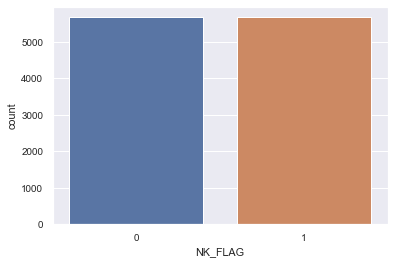

In [45]:
chck = pd.DataFrame()
chck['NK_FLAG'] = y_train

sns.countplot(chck['NK_FLAG'])

-----

## Datasete farklı modellerin denenmesi

### Decision Tree (Train Data)

96.13327848621967
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2431
           1       0.96      0.97      0.96      2431

    accuracy                           0.96      4862
   macro avg       0.96      0.96      0.96      4862
weighted avg       0.96      0.96      0.96      4862



<AxesSubplot:>

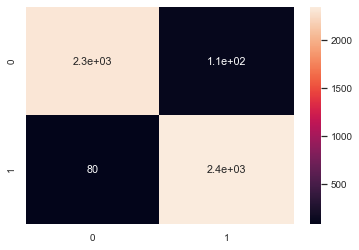

In [59]:
dtree = tree.DecisionTreeClassifier()

# Fit
dtree.fit(X_train, y_train)
score = dtree.score(X_test, y_test)
# Predict
preds = dtree.predict(X_test)

print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

### Decision Tree (Validation Data)

82.16666666666667
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2419
           1       0.57      0.33      0.42       581

    accuracy                           0.82      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.80      0.82      0.80      3000



<AxesSubplot:>

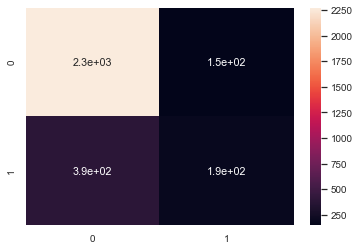

In [60]:
threshold = 0.5
preds = (dtree.predict_proba(X_val)[:,1] >= threshold).astype("int")
score = dtree.score(X_val, y_val)
print(score*100)
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True)

------

### RandomForestClassifier (Train Data)

98.72480460715755
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2431
           1       0.98      0.99      0.99      2431

    accuracy                           0.99      4862
   macro avg       0.99      0.99      0.99      4862
weighted avg       0.99      0.99      0.99      4862



<AxesSubplot:>

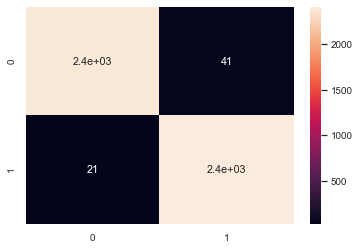

In [61]:
rfc = RandomForestClassifier(random_state=42)

# Fit
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)
# Predict
preds = rfc.predict(X_test)

print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

### RandomForestClassifier (Validation Data)

88.3
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2419
           1       0.83      0.52      0.64       581

    accuracy                           0.89      3000
   macro avg       0.86      0.75      0.79      3000
weighted avg       0.88      0.89      0.88      3000



<AxesSubplot:>

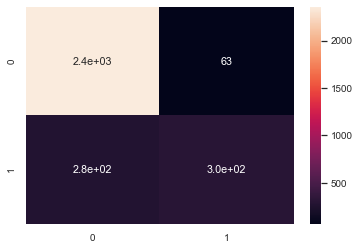

In [62]:
threshold = 0.5
preds = (rfc.predict_proba(X_val)[:,1] >= threshold).astype("int")
score = rfc.score(X_val, y_val)
print(score*100)
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True)

-----

### Logistic Regression (Train Data)

77.47840394899218
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2431
           1       0.80      0.73      0.76      2431

    accuracy                           0.77      4862
   macro avg       0.78      0.77      0.77      4862
weighted avg       0.78      0.77      0.77      4862



C:\Users\Furkan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<AxesSubplot:>

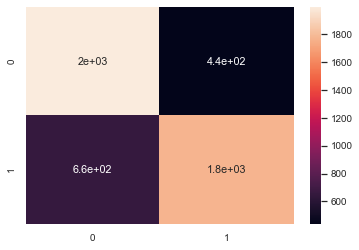

In [63]:
logistic = LogisticRegression(random_state=42, max_iter=200)

# Fit
logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
y_pred=logistic.predict(X_test)

# Predict
preds = logistic.predict(X_test)

print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

### Logistic Regression  (Validation Data)

70.19999999999999
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2419
           1       0.36      0.73      0.49       581

    accuracy                           0.70      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.81      0.70      0.73      3000



<AxesSubplot:>

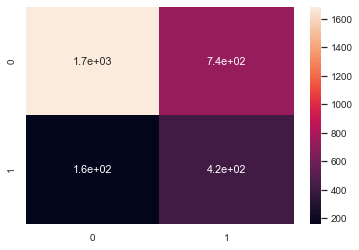

In [64]:
threshold = 0.5
preds = (logistic.predict_proba(X_val)[:,1] >= threshold).astype("int")
score = logistic.score(X_val, y_val)
print(score*100)
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True)

-----

### CatBoostClassifier (Train  Data)

98.19004524886877
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2431
           1       0.98      0.99      0.98      2431

    accuracy                           0.98      4862
   macro avg       0.98      0.98      0.98      4862
weighted avg       0.98      0.98      0.98      4862



<AxesSubplot:>

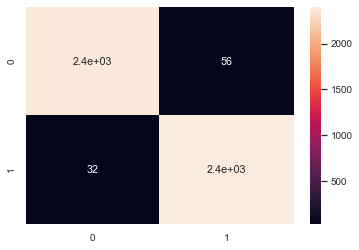

In [65]:
cbc=CatBoostClassifier(n_estimators = 150, max_depth = 5, verbose = 0 ,learning_rate = 0.12, random_state=17)
cbc.fit(X_train, y_train)
preds = cbc.predict(X_test)
score = cbc.score(X_test, y_test)
print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

### CatBoostClassifier (Validation Test Data)

90.4
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2419
           1       0.72      0.82      0.77       581

    accuracy                           0.90      3000
   macro avg       0.84      0.87      0.85      3000
weighted avg       0.91      0.90      0.91      3000



<AxesSubplot:>

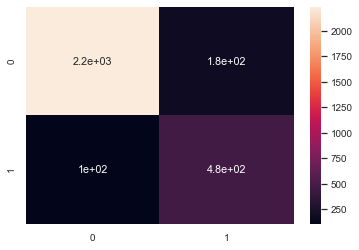

In [66]:
threshold = 0.5
preds = (cbc.predict_proba(X_val)[:,1] >= threshold).astype("int")
score = cbc.score(X_val, y_val)
print(score*100)
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True)

----

### XGBoost Classifier (Train Data)

C:\Users\Furkan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
98.80707527766351
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2431
           1       0.98      0.99      0.99      2431

    accuracy                           0.99      4862
   macro avg       0.99      0.99      0.99      4862
weighted avg       0.99      0.99      0.99      4862



<AxesSubplot:>

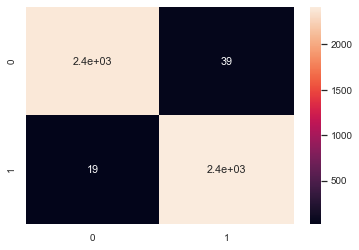

In [67]:
xgb_cl = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=10)


# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)
score = xgb_cl.score(X_test, y_test)
# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)
0.8507080984463082
print(score*100)
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

### XGBoost Classifier (Validation Data)

90.2
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2419
           1       0.75      0.75      0.75       581

    accuracy                           0.90      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.90      0.90      0.90      3000



<AxesSubplot:>

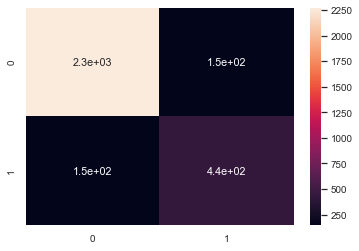

In [68]:
threshold = 0.5
preds = (xgb_cl.predict_proba(X_val)[:,1] >= threshold).astype("int")
#preds = cbc.predict(X_val)
score = xgb_cl.score(X_val, y_val)
print(score*100)
print(classification_report(y_val, preds))
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True)

----------------

### Feature Importance 

C:\Users\Furkan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



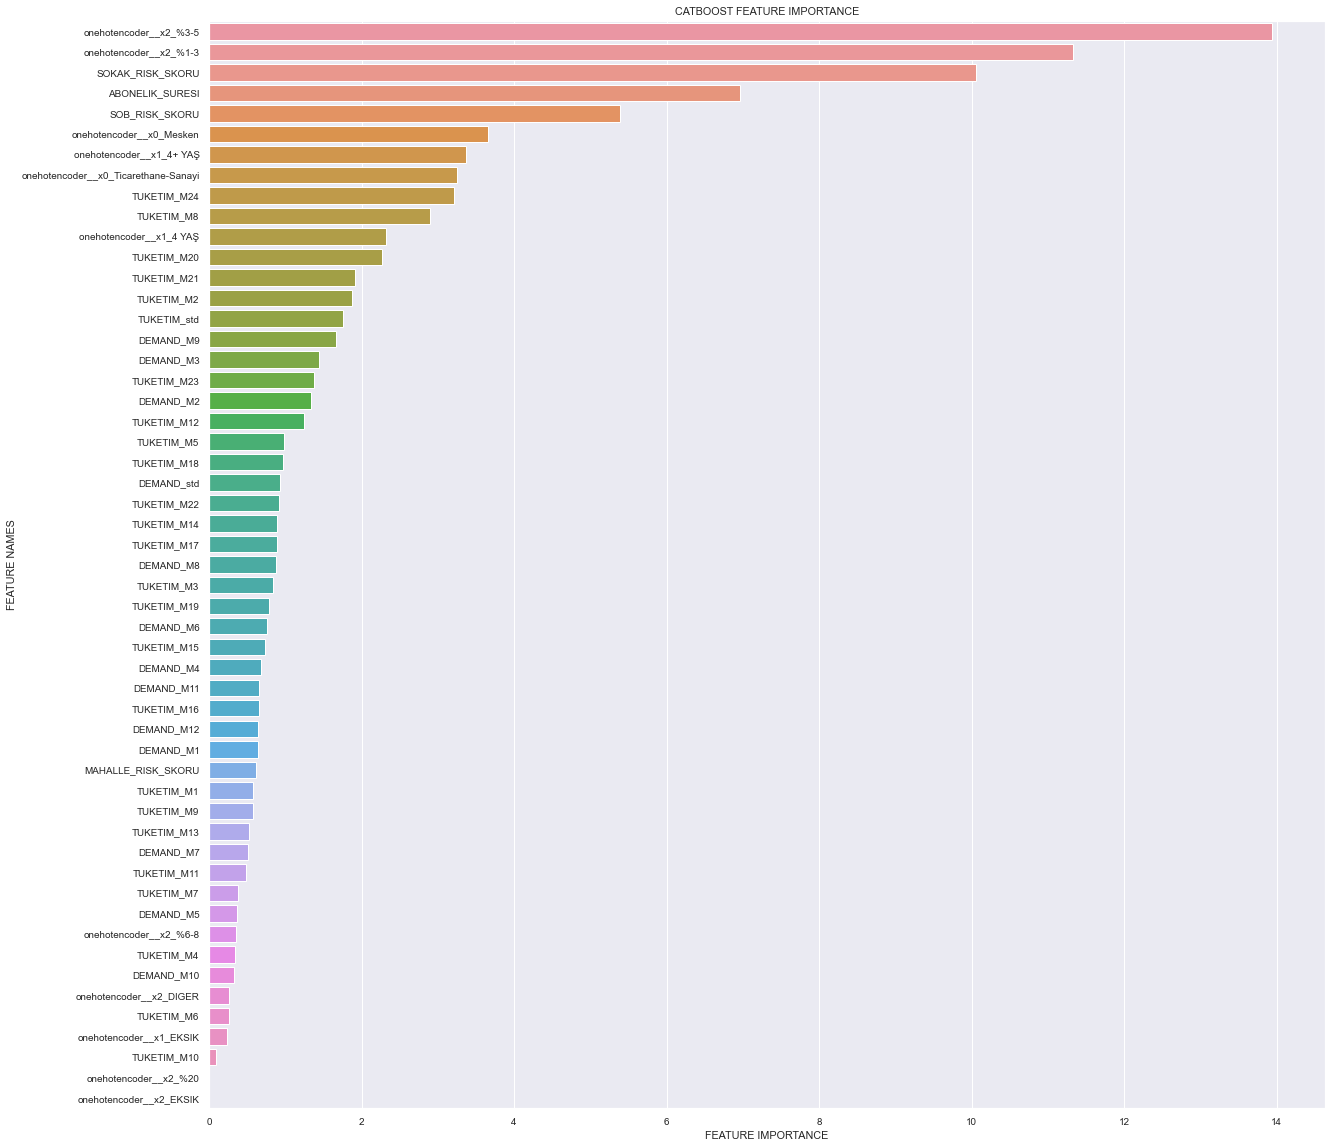

In [69]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
   
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(cbc.get_feature_importance(),ct.get_feature_names(),'CATBOOST')

------

### ROC Curve

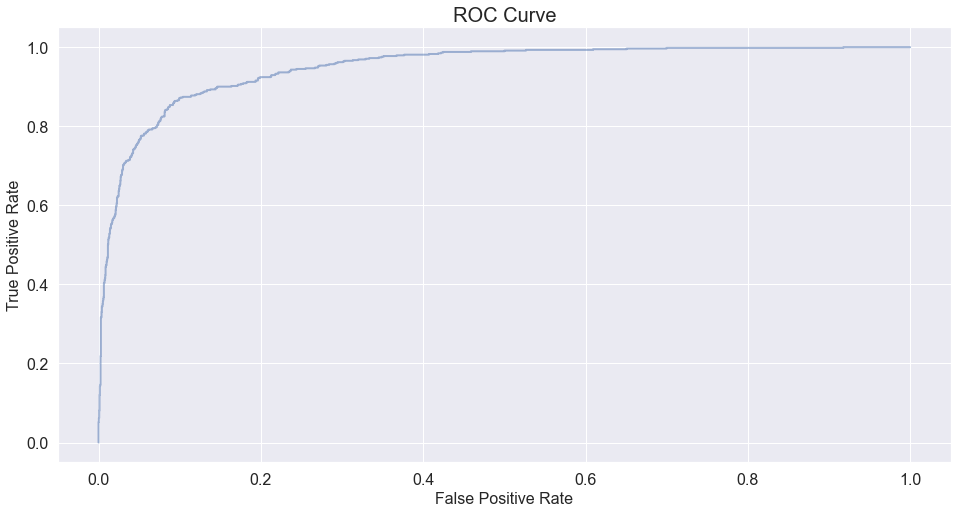

In [70]:
from catboost.utils import get_roc_curve

catboost_pool = Pool(X_val, y_val)
model = CatBoostClassifier(learning_rate=0.03)
model.fit(X_train, y_train, verbose=False)
(fpr, tpr, thresholds) = get_roc_curve(model, catboost_pool, plot=True)